<a href="https://colab.research.google.com/github/Bibek0130/API-/blob/master/%3Baptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Laptop price predicition


#Data exploration

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#loading the dataset
df = pd.read_csv("laptop_dataset.csv")

In [ ]:
#checking the first five rows
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [ ]:
#checking number of rows and columns
df.shape
#cheking the product of rows and columns
df.size

25920

In [ ]:
#checking the names of columns
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [ ]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [ ]:
#getting the statistical summary
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


#Data cleaning

In [ ]:
#checking the null values
df.isnull().sum()

,0
Laptop,0
Status,0
Brand,0
Model,0
CPU,0
RAM,0
Storage,0
Storage type,42
GPU,1371
Screen,4


In [ ]:
df.drop(['GPU'], axis = 1 , inplace = True)

In [ ]:
#dropping the null values
df.dropna(inplace = True)

In [ ]:
#checking the duplicate values
df.duplicated().value_counts()

,count
False,2114


#Data Visualization


In [ ]:
#checking unique values
df.nunique()

,0
Laptop,2114
Status,2
Brand,27
Model,119
CPU,27
RAM,9
Storage,11
Storage type,2
Screen,28
Touch,2


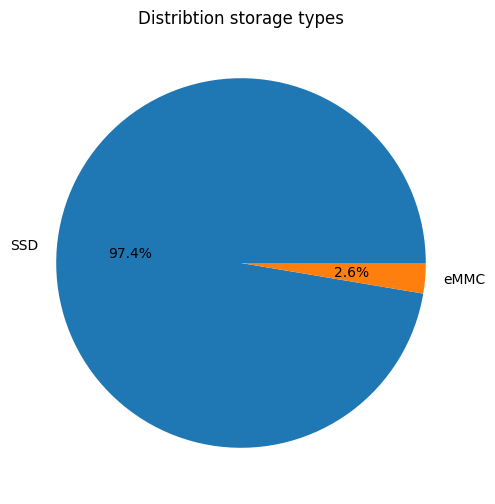

In [ ]:
#'storage types' culumn-pie chart
plt.figure(figsize=(8,6))
sizes = df['Storage type'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribtion storage types')
plt.show()


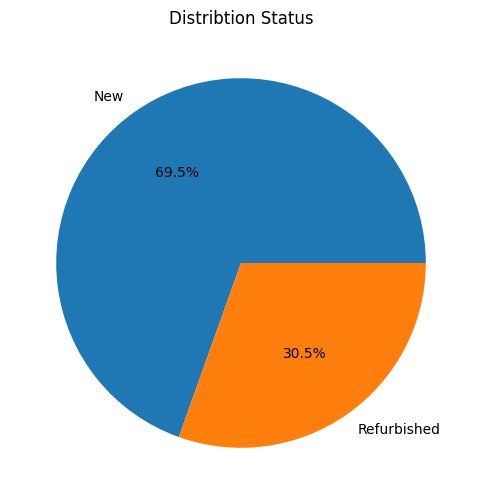

In [ ]:
#'status' pie chart
plt.figure(figsize=(8,6))
sizes = df['Status'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribtion Status')
plt.show()

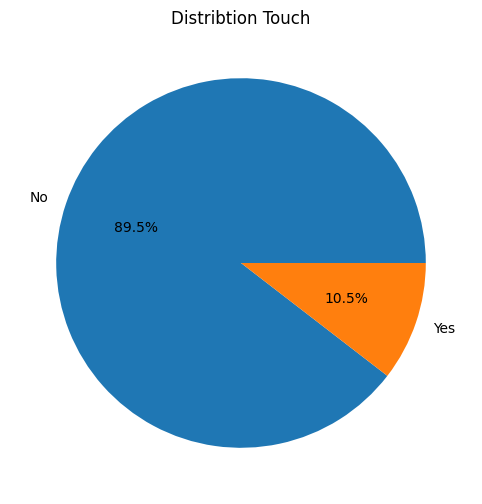

In [ ]:
#'Touch' piechart
plt.figure(figsize=(8,6))
sizes = df['Touch'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribtion Touch')
plt.show()

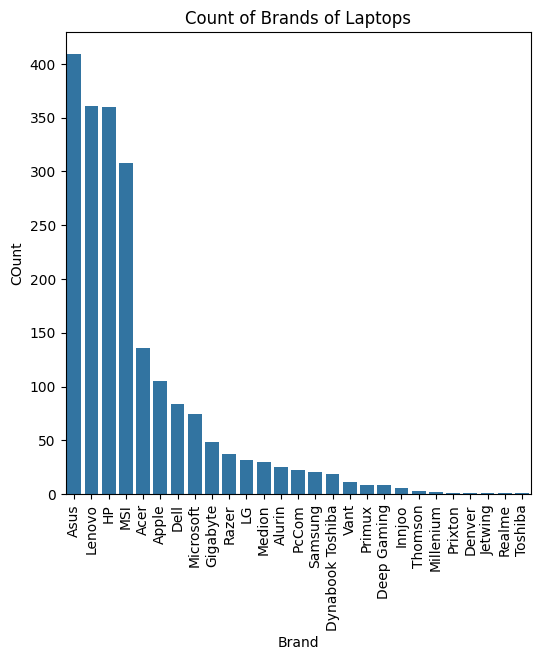

In [ ]:
#'Brand' column - Barplot
plt.figure(figsize=(6,6))
touch_counts = df['Brand'].value_counts()
sns.barplot(x = touch_counts.index, y=touch_counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('COunt')
plt.title('Count of Brands of Laptops')
plt.show()

Text(0.5, 1.0, 'Count of CPU')

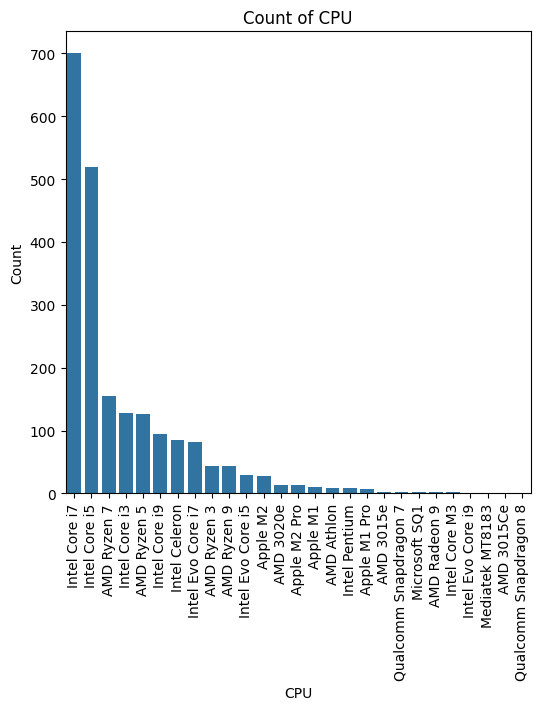

In [ ]:
#'CPU column' Bar plot
plt.figure(figsize=(6,6))
touch_counts = df['CPU'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('CPU')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of CPU')

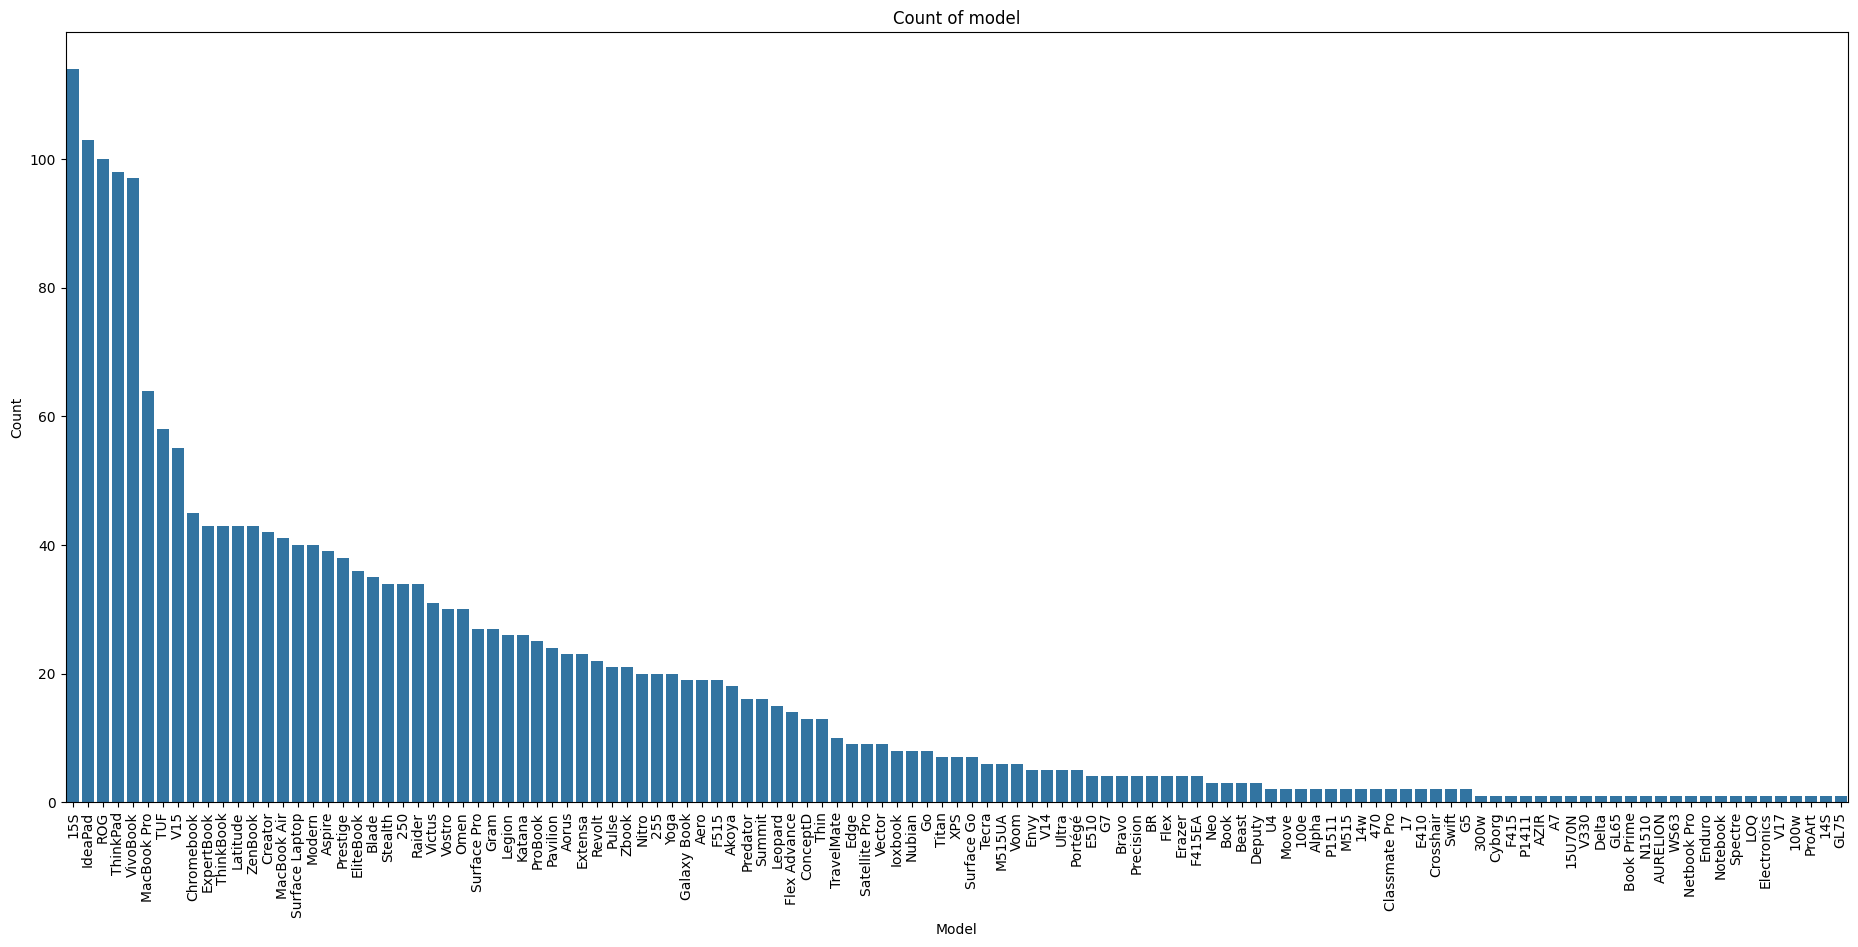

In [ ]:
#'Model Column' Bar plot
plt.figure(figsize=(23,10))
touch_counts = df['Model'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of model')
plt.show()

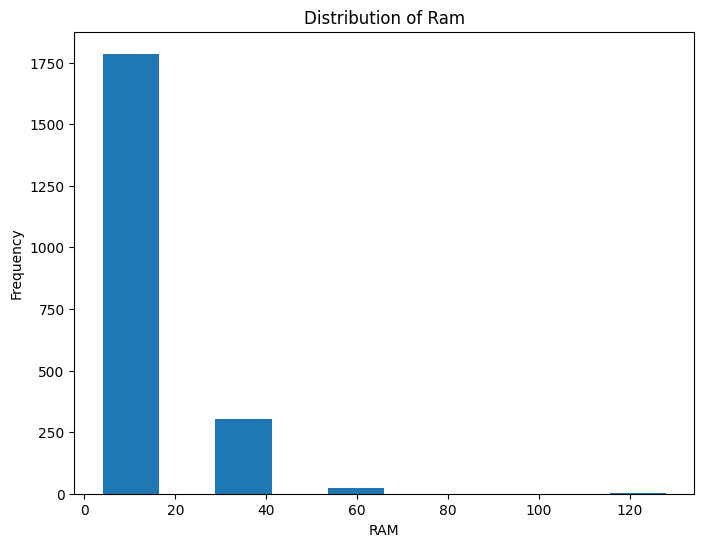

In [ ]:
#'Ram' Histogram
plt.figure(figsize=(8,6))
plt.hist(df['RAM'], bins=10)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of Ram')
plt.show()

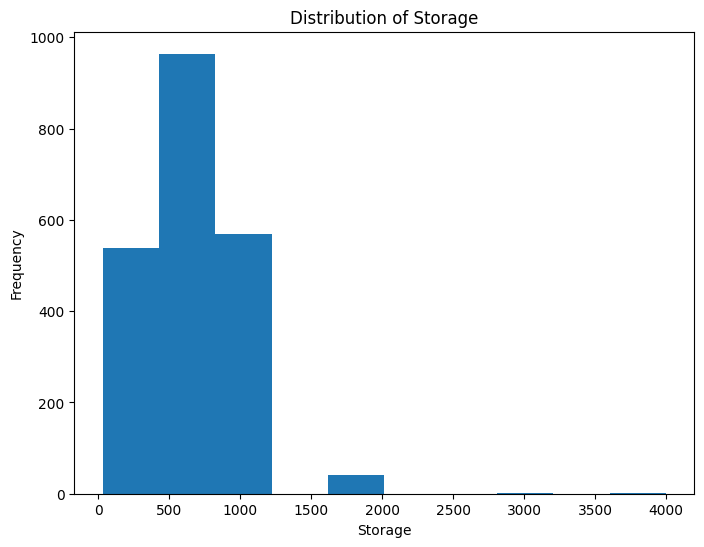

In [ ]:
#'Storage' histogram
plt.figure(figsize=(8,6))
plt.hist(df['Storage'], bins=10)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Distribution of Storage')
plt.show()

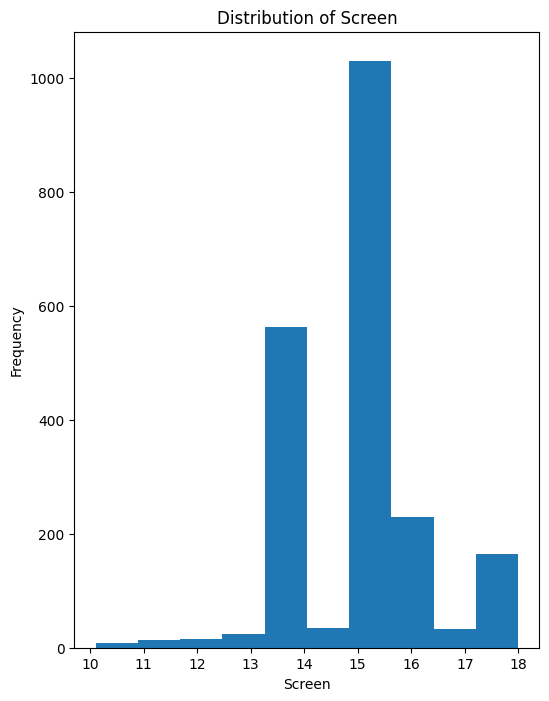

In [ ]:
#'Screen' histogram
plt.figure(figsize=(6,8))
plt.hist(df['Screen'], bins=10)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Distribution of Screen')
plt.show()

#Feature Engineering


In [ ]:
#label encoding
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage type'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])


#Correlataion Analysis

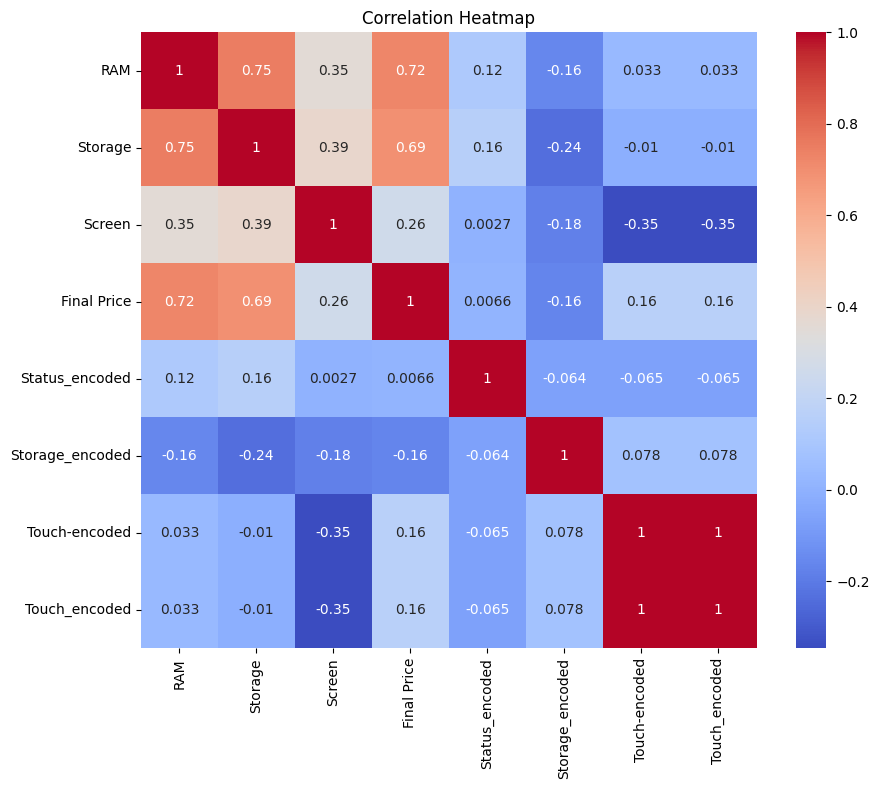

In [ ]:
#select only numerical
df_numerical = df.select_dtypes(include=['number'])
# Compute the correlation matrix
corr_matrix = df_numerical.corr()
# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

#Data modelling


In [ ]:
#prepate the data
X = df[['RAM', 'Storage', 'Screen', 'Status_encoded', 'Storage_encoded', 'Touch_encoded']]
y = df['Final Price'] #Dependent variable

#split the data into training and tresting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#create a linear regression model and fit it into the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the laptop prices for the test data
y_pred = model.predict(X_test)

#Linear Regression Visulatilzation

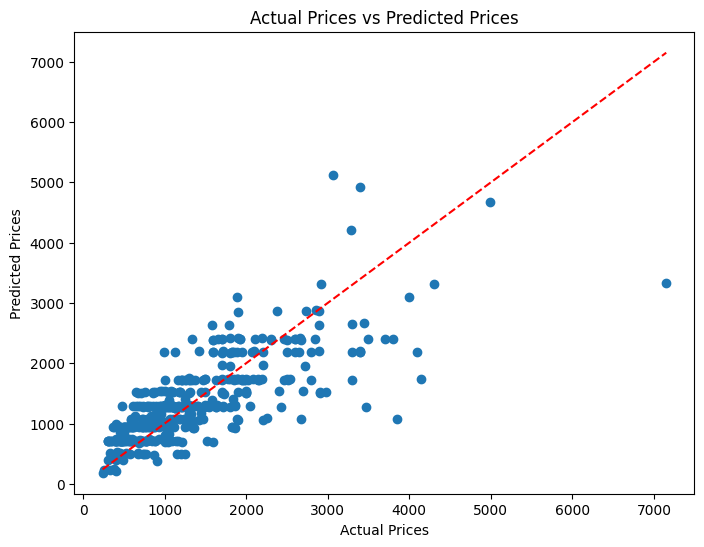

In [ ]:
#Linear regression visualization
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


#Model evaluation

In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 323695.691237309
Root Mean Squared Error: 568.9426080346848
Mean Absolute Error: 401.3273209729588
R-squared: 0.5832382262482508


In [ ]:
#model intrepretation
coefficients = model.coef_
intercept = model.intercept_
print('Coeffficeints: ', coefficients)
print('Intercept: ', intercept)


Coeffficeints:  [  42.22482889    0.90614025    8.57482185 -211.39911504 -127.34749912
  455.95399793]
Intercept:  13.878065598776175


#predicting price usingnew data


In [ ]:
#example input for new laptop
new_laptop = np.array([[8, 256, 13, 0, 1, 1]])

#predict the price of  the new laptop
predicted_price = model.predict(new_laptop)
print('Predicted Price: ', predicted_price)

Predicted Price:  [1023.7277834]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
